<img src="images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

# Emoticon

***

***

***  

## License
This project is licensed under the Apache License 2.0 - see the [LICENSE](https://github.com/Qiskit/qiskit-tutorial/blob/master/LICENSE) file for details.

In [42]:
import sys
sys.path.append("../../qiskit-sdk-py/")
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
# import Qconfig
import math
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ

In [38]:
IBMQ.save_account('589442502d2117dece9d33e6f6503499fb90e4f4e8653b9e55abb7f758fd6356483a35df5fba25ab5c7de5e7535ad3aa15916d88c49292bfce4d584bb6ab38f9')
IBMQ.load_accounts()
IBMQ.backends()

/srv/conda/lib/python3.7/site-packages/qiskit/backends/ibmq/ibmqprovider.py:141: UserWarning: Credentials are already stored.
  warnings.warn('Credentials are already stored.')
/srv/conda/lib/python3.7/site-packages/qiskit/backends/ibmq/ibmqprovider.py:258: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx5') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

In [63]:
# qp = QuantumProgram()
# qp.set_api(Qconfig.APItoken, Qconfig.config["url"]) # set the APIToken and API url

# set up registers and program
qr = QuantumRegister(16, 'qr')
cr = ClassicalRegister(16, 'cr')
qc = QuantumCircuit(qr,cr)

# rightmost eight (qu)bits have ')' = 00101001
qc.x(qr[0])
qc.x(qr[3])
qc.x(qr[5])

# second eight (qu)bits have superposition of
# '8' = 00111000
# ';' = 00111011
# these differ only on the rightmost two bits
qc.h(qr[9]) # create superposition on 9
qc.cx(qr[9],qr[8]) # spread it to 8 with a cnot
qc.x(qr[11])
qc.x(qr[12])
qc.x(qr[13])

# measure
for j in range(16):
    qc.measure(qr[j],cr[j])

backend = IBMQ.get_backend('ibmq_qasm_simulator')

# run and get results
job = execute(qc, backend, shots=1024)
result = job.result()

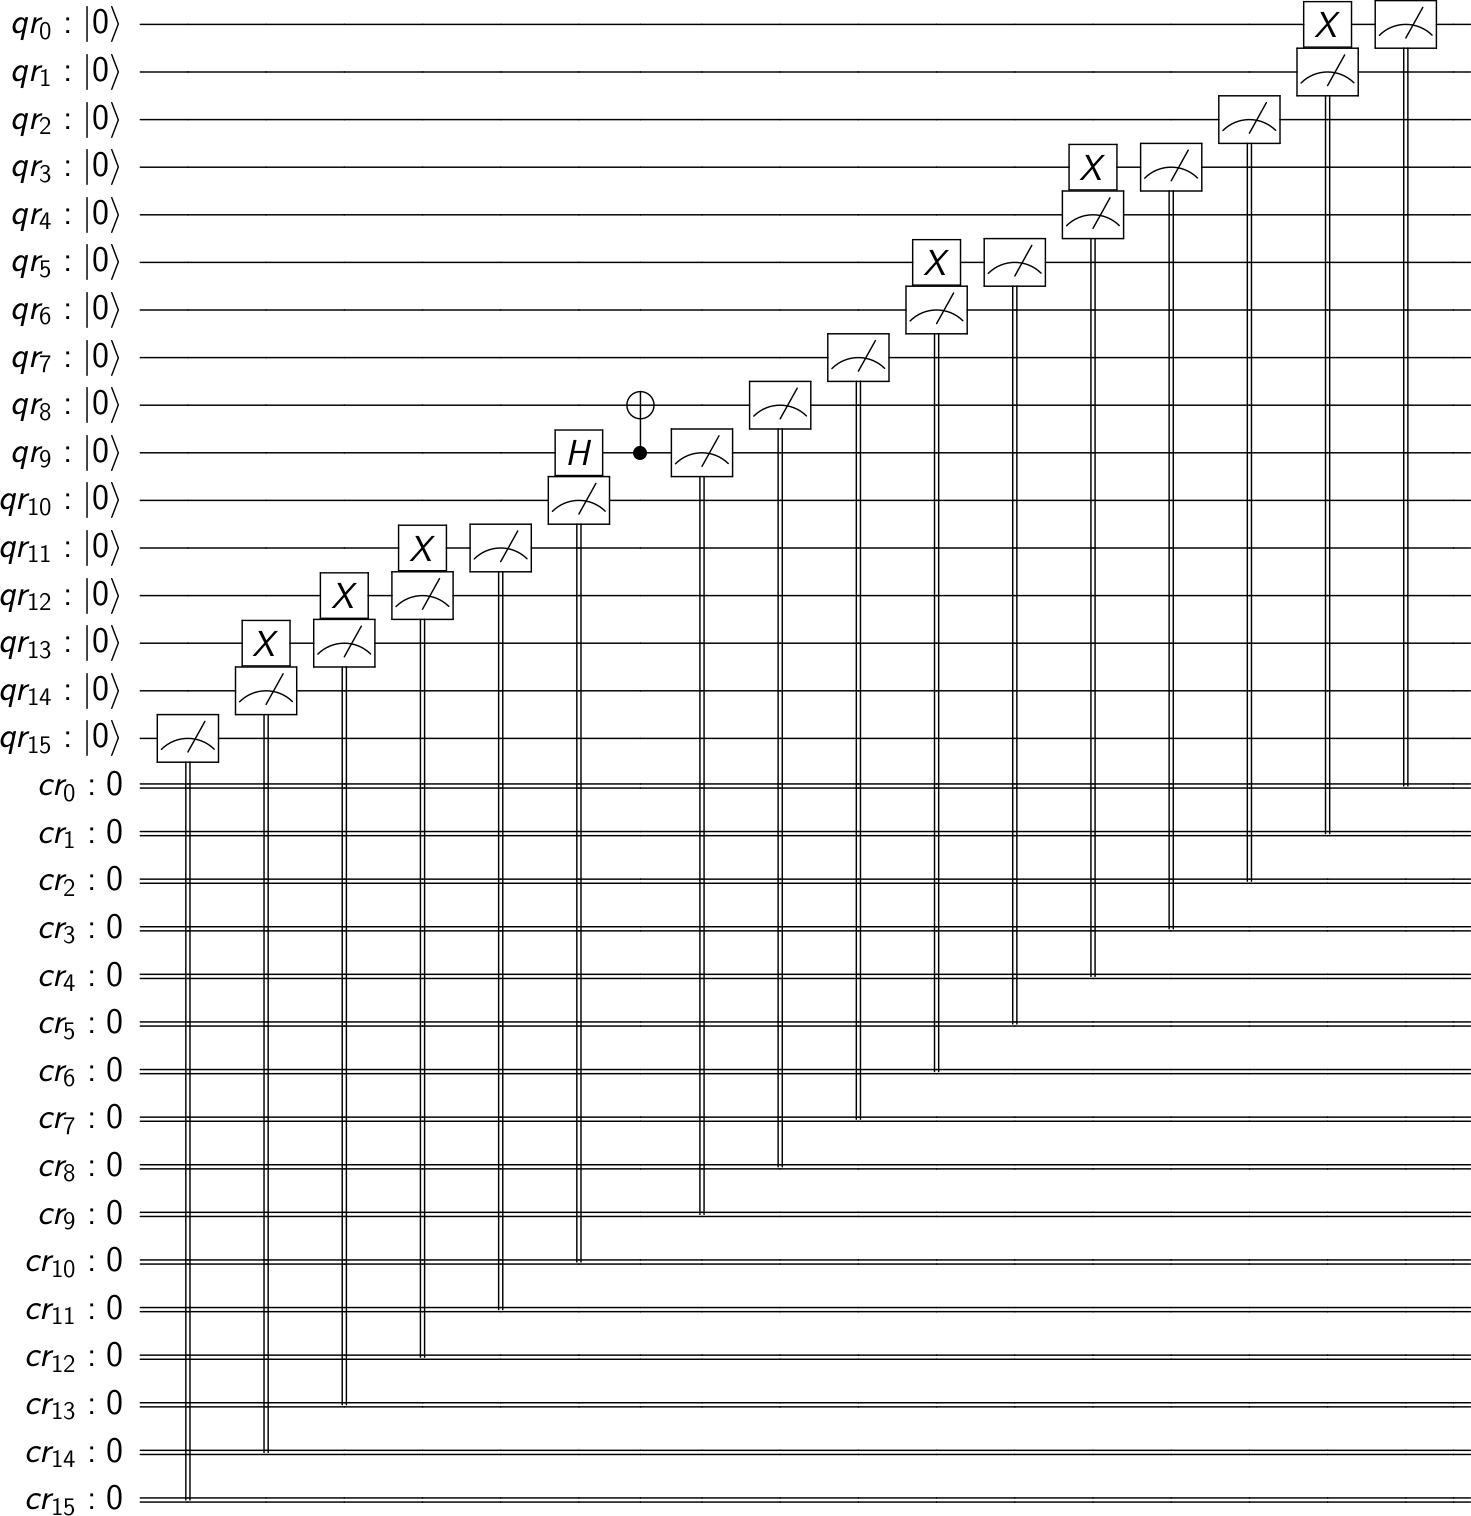

In [64]:
circuit_drawer(qc)

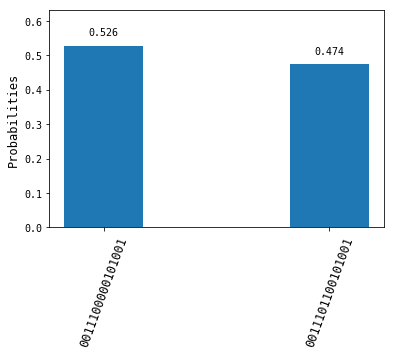

In [65]:
counts_exp = result.get_counts(qc)
plot_histogram(counts_exp)

In [68]:
characterDict = {}
for bitString in counts_exp: # loop over all results
    char1 = chr(int(bitString[0:8] ,2)) # get string of leftmost 8 bits an convert to an ASCII character
    char2 = chr(int(bitString[8:16] ,2)) # same for string of leftmost 8 bits
    characterDict[ char1 + char2 ] = counts_exp[bitString] / 1024

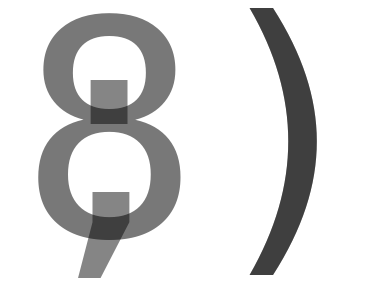

In [69]:
import matplotlib.pyplot as plt
plt.rc('font', family='monospace')
for char in characterDict.keys():
    # plot all characters on top of each other with alpha given by how often it turned up in the output
    plt.annotate( char, (0.5,0.5), va="center", ha="center", color = (0,0,0,characterDict[char]), size = 300)
plt.axis('off')
plt.show()